### 6.2 Black Wednesday: The UK Joining & Leaving the ERM

## Collecting exchange rate data 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  #turn off warning messages as unnecessary in this context
#function to convert quarter formatting to graph readable dates
def convert_to_datetime(date):
    try:
        # If it's a full year (e.g., '1998'), convert to January 1st of that year
        if date.isdigit():
            return pd.to_datetime(date + '-01-01')
        # If it's in 'Qx YYYY' format (e.g., 'Q4 1998')
        elif 'Q' in date:
            return pd.to_datetime(date.replace('Q1', '01').replace('Q2', '04')
                                  .replace('Q3', '07').replace('Q4', '10'), format='%m %Y')
        else:
            return pd.NaT  # Return Not a Time for unrecognized formats
    except:
        return pd.NaT  # Catch errors

# Google Sheets link
sheet_url = "https://docs.google.com/spreadsheets/d/1lkPcze6wAjrg3Rzj_gd1wA_Y8HG2hMPC/edit?usp=drive_link&ouid=104629393755116582960&rtpof=true&sd=true"

# Convert the link to a CSV export link
csv_url = sheet_url.replace("/edit?usp=drive_link", "/gviz/tq?tqx=out:csv")

# Read the data into a DataFrame
df = pd.read_csv(csv_url)

# Set the first column as index (assuming it contains country names)
df.set_index(df.columns[0], inplace=True)

# Create a copy to avoid modifying a slice
df_cleaned = df.dropna(subset=['Germany', 'United Kingdom'], axis=1).copy()

# Add new row for DM/£ exchange rate
df_cleaned.loc['DM/£'] = df_cleaned.loc['Germany'] / df_cleaned.loc['United Kingdom']

# Reset the index so that 'Germany' and 'United Kingdom' become normal columns
df_cleaned = df.T.reset_index()

# Rename the index column to 'Date'
df_cleaned.rename(columns={'index': 'Date'}, inplace=True)

# Apply conversion to 'Date' column
df_cleaned['Date'] = df_cleaned['Date'].astype(str).apply(convert_to_datetime)

# Drop any remaining NaN values if needed
df_cleaned = df_cleaned.dropna(subset=['Date'])

# Sort by date (optional, but useful for plotting)
df_cleaned = df_cleaned.sort_values(by='Date')

# Reset index for better readability
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.rename(columns={'Germany':'Germany_ER','United Kingdom':'UK_ER'}, inplace=True)

display(df_cleaned)



International Financial Statistics (IFS),Date,Germany_ER,UK_ER
0,1950-01-01,4.19,0.36
1,1951-01-01,4.19,0.36
2,1952-01-01,4.19,0.36
3,1953-01-01,4.20,0.36
4,1954-01-01,4.20,0.36
...,...,...,...
342,2024-01-01,NaN,0.78
343,2024-01-01,NaN,0.79
344,2024-04-01,NaN,0.79
345,2024-07-01,NaN,0.77


In [64]:
sheet_url = "https://docs.google.com/spreadsheets/d/1qbmUH8W7hympgmjrGSkiIiIXu0XurN-f/edit?usp=drive_link&ouid=104629393755116582960&rtpof=true&sd=true"

# Convert the link to a CSV export link
csv_url = sheet_url.replace("/edit?usp=drive_link", "/gviz/tq?tqx=out:csv")

# Read the data into a DataFrame
df2 = pd.read_csv(csv_url)

# Set the first column as index (assuming it contains country names)
df2.set_index(df2.columns[0], inplace=True)


# Create a copy to avoid modifying a slice
df_cleaned2 = df2.dropna(subset=['Germany', 'United Kingdom'], axis=1).copy()

# Reset index
df_cleaned2 = df2.T.reset_index()

# Rename the index column to 'Date'
df_cleaned2.rename(columns={'index': 'Date'}, inplace=True)

# Apply conversion to 'Date' column
df_cleaned2['Date'] = df_cleaned2['Date'].astype(str).apply(convert_to_datetime)

# Drop any remaining NaN values if needed
df_cleaned2 = df_cleaned2.dropna(subset=['Date'])

# Sort by date (optional, but useful for plotting)
df_cleaned2 = df_cleaned2.sort_values(by='Date')

# Reset index for better readability
df_cleaned2 = df_cleaned2.reset_index(drop=True)
df_cleaned2.rename(columns={'Germany':'Germany_CPI','United Kingdom':'UK_CPI'}, inplace=True)
# Display updated DataFrame
display(df_cleaned2)


International Financial Statistics (IFS),Date,Germany_CPI,UK_CPI
0,1951-01-01,7.65,NaN
1,1952-01-01,2.13,NaN
2,1953-01-01,-1.86,NaN
3,1954-01-01,0.24,NaN
4,1955-01-01,1.65,NaN
...,...,...,...
345,2024-01-01,2.26,3.27
346,2024-01-01,2.52,3.92
347,2024-04-01,2.29,2.87
348,2024-07-01,1.93,2.91


In [65]:
# collecting industrial production data 


sheet_url = "https://docs.google.com/spreadsheets/d/1vNlSvHgbiA_AWwftyPML7QPoVpUs3_3S/edit?usp=drive_link&ouid=104629393755116582960&rtpof=true&sd=true"

# Convert the link to a CSV export link
csv_url = sheet_url.replace("/edit?usp=drive_link", "/gviz/tq?tqx=out:csv")

# Read the data into a DataFrame
df3 = pd.read_csv(csv_url)

# Set the first column as index (assuming it contains country names)
df3.set_index(df3.columns[0], inplace=True)


# Create a copy to avoid modifying a slice
df_cleaned3 = df3.dropna(subset=['Germany', 'United Kingdom'], axis=1).copy()


df_cleaned3 = df3.T.reset_index()

# Rename the index column to 'Date'
df_cleaned3.rename(columns={'index': 'Date'}, inplace=True)

df_cleaned3 = df_cleaned3.dropna(subset=['Germany'])

df_cleaned3 = df_cleaned3.dropna(subset=['United Kingdom'])


# Apply conversion to 'Date' column
df_cleaned3['Date'] = df_cleaned3['Date'].astype(str).apply(convert_to_datetime)

# Drop any remaining NaN values if needed
df_cleaned3 = df_cleaned3.dropna(subset=['Date'])

# Reset index for better readability
df_cleaned3 = df_cleaned3.reset_index(drop=True)
df_cleaned3.rename(columns={'Germany':'Germany_IP','United Kingdom':'UK_IP'}, inplace=True)
# Display updated DataFrame
display(df_cleaned3)


International Financial Statistics (IFS),Date,Germany_IP,UK_IP
0,1958-01-01,27.33,44.74
1,1958-01-01,26.13,45.28
2,1958-04-01,27.50,42.98
3,1958-07-01,26.31,39.59
4,1958-10-01,28.70,45.01
...,...,...,...
323,2022-07-01,103.46,101.59
324,2022-10-01,105.88,105.04
325,2023-01-01,107.24,105.48
326,2023-04-01,102.09,103.39


In [66]:
countries_df_temp = pd.merge(df_cleaned, df_cleaned2, on=['Date'], how='inner')
countries_df_temp2 = pd.merge(countries_df_temp, df_cleaned3, on=['Date'], how='inner')
countries_df_temp2['DM/GBP'] = countries_df_temp2['Germany_ER']  / countries_df_temp2['UK_ER']  
countries_df = countries_df_temp2[countries_df_temp2['Date'].dt.year >= 1980]
display(countries_df)

International Financial Statistics (IFS),Date,Germany_ER,UK_ER,Germany_CPI,UK_CPI,Germany_IP,UK_IP,DM/GBP
242,1980-01-01,1.82,0.43,5.44,17.97,66.64,70.31,4.232558
243,1980-01-01,1.82,0.43,5.44,17.97,67.79,74.62,4.232558
244,1980-01-01,1.82,0.43,5.52,19.08,66.64,70.31,4.232558
245,1980-01-01,1.82,0.43,5.52,19.08,67.79,74.62,4.232558
246,1980-01-01,1.77,0.44,5.44,17.97,66.64,70.31,4.022727
...,...,...,...,...,...,...,...,...
716,2023-01-01,NaN,0.80,8.24,8.98,107.24,105.48,NaN
717,2023-01-01,NaN,0.82,5.95,6.79,107.24,105.48,NaN
718,2023-01-01,NaN,0.82,8.24,8.98,107.24,105.48,NaN
719,2023-04-01,NaN,0.80,6.55,7.68,102.09,103.39,NaN


## Question 1: What was a key reason for why the UK chose to join the ERM and fix their exchange rate? 

The UK joined the ERM to stabilize its currency, reduce inflation, and align with European economic policies.

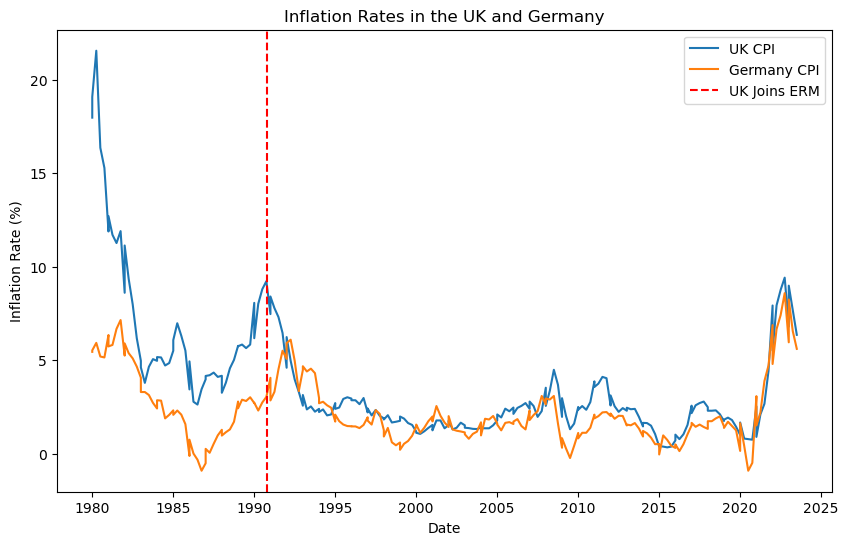

In [67]:

# Plot inflation rates (assuming you have inflation data in your DataFrame)
plt.figure(figsize=(10, 6)) #set figure size
plt.plot(countries_df['Date'], countries_df['UK_CPI'], label='UK CPI') #plot uk cpi data
plt.plot(countries_df['Date'], countries_df['Germany_CPI'], label='Germany CPI') #plot germany cpi data
plt.axvline(x=pd.to_datetime('1990-10-08'), color='r', linestyle='--', label='UK Joins ERM') #set date as x axis
plt.title('Inflation Rates in the UK and Germany')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()

## Question 2: What factors led to George Soros and other currency speculators to run on the pound?

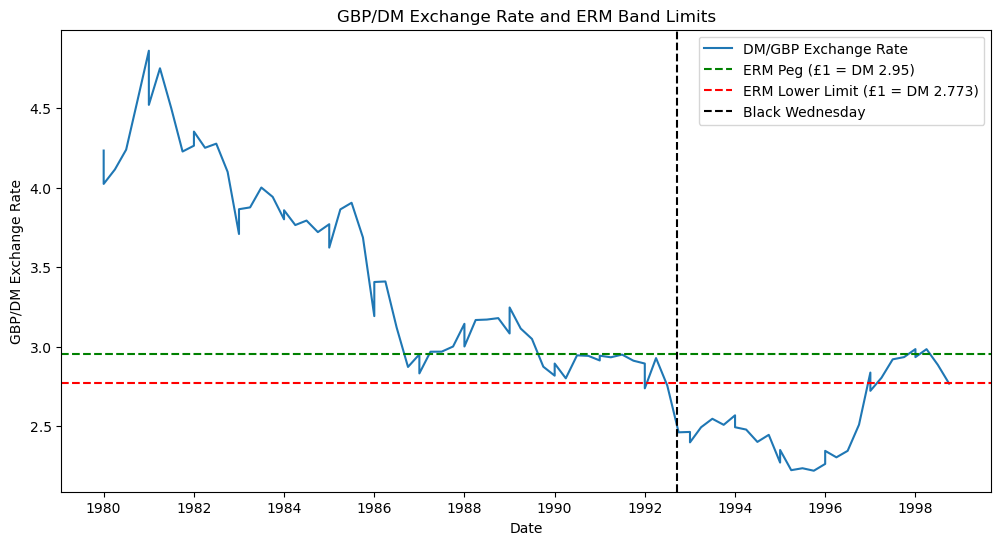

In [68]:
# Plot GBP/DM exchange rate and ERM band limits
plt.figure(figsize=(12, 6)) #set figure size 
plt.plot(countries_df['Date'], countries_df['DM/GBP'], label='DM/GBP Exchange Rate') #plot GBP/DM exchange rate 
plt.axhline(y=2.95, color='g', linestyle='--', label='ERM Peg (£1 = DM 2.95)') #add line for ERM Peg
plt.axhline(y=2.773, color='r', linestyle='--', label='ERM Lower Limit (£1 = DM 2.773)') #Add line for ERM lower limit
plt.axvline(x=pd.to_datetime('1992-09-16'), color='k', linestyle='--', label='Black Wednesday') #add line to indicate Black Wednesday
plt.title('GBP/DM Exchange Rate and ERM Band Limits')
plt.xlabel('Date')
plt.ylabel('GBP/DM Exchange Rate')
plt.legend()
plt.show()

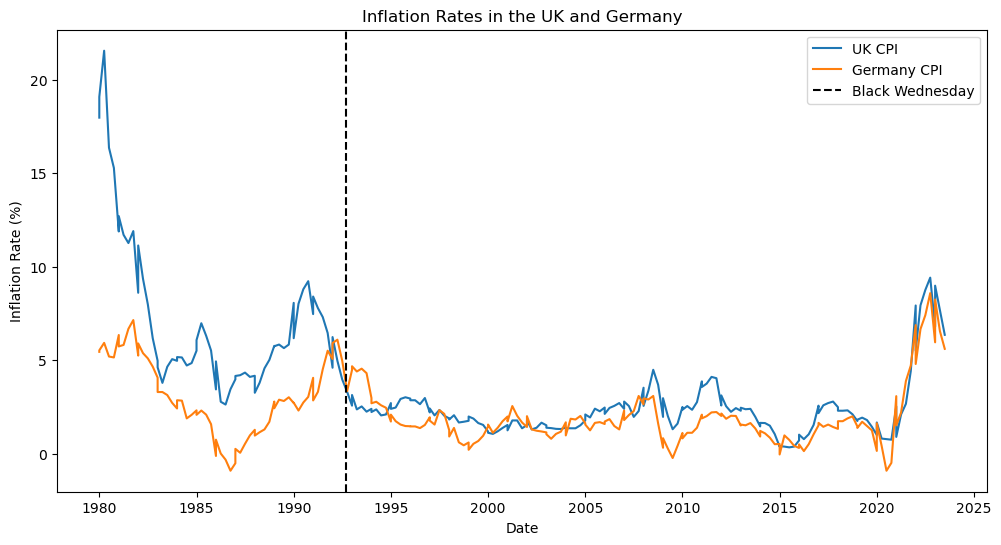

In [69]:
# Plot UK and Germany inflation rates
plt.figure(figsize=(12, 6))
plt.plot(countries_df['Date'], countries_df['UK_CPI'], label='UK CPI') #plot UK cpi data
plt.plot(countries_df['Date'], countries_df['Germany_CPI'], label='Germany CPI') #plot germany cpi data
plt.axvline(x=pd.to_datetime('1992-09-16'), color='k', linestyle='--', label='Black Wednesday') #add line for black wednesday
plt.title('Inflation Rates in the UK and Germany')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()

## Question 3: Is there evidence that the UK joining the ERM and leaving after Black Wednesday led to changes in the volatility of the monthly growth in the real exchange rate? Are there any corresponding changes in the volatility of either the difference in inflation between the UK and Germany or the growth in industrial production? 

In [70]:

# Calculate monthly growth rates
countries_df['Exchange Rate Growth'] = countries_df['DM/GBP'].pct_change() * 100  # Real exchange rate growth
countries_df['Inflation Difference'] = countries_df['UK_CPI'] - countries_df['Germany_CPI']  # Inflation difference
countries_df['Inflation Diff Growth'] = countries_df['Inflation Difference'].pct_change() * 100  # Inflation difference growth
countries_df['Industrial Production Growth'] = countries_df['UK_IP'].pct_change() * 100  # Industrial production growth



# Display the DataFrame
print("DataFrame with growth rates:")
display(countries_df)

DataFrame with growth rates:


/tmp/ipykernel_497/4084435776.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  countries_df['Exchange Rate Growth'] = countries_df['DM/GBP'].pct_change() * 100  # Real exchange rate growth


International Financial Statistics (IFS),Date,Germany_ER,UK_ER,Germany_CPI,UK_CPI,Germany_IP,UK_IP,DM/GBP,Exchange Rate Growth,Inflation Difference,Inflation Diff Growth,Industrial Production Growth
242,1980-01-01,1.82,0.43,5.44,17.97,66.64,70.31,4.232558,NaN,12.53,NaN,NaN
243,1980-01-01,1.82,0.43,5.44,17.97,67.79,74.62,4.232558,0.000000,12.53,0.000000,6.129996
244,1980-01-01,1.82,0.43,5.52,19.08,66.64,70.31,4.232558,0.000000,13.56,8.220271,-5.775931
245,1980-01-01,1.82,0.43,5.52,19.08,67.79,74.62,4.232558,0.000000,13.56,0.000000,6.129996
246,1980-01-01,1.77,0.44,5.44,17.97,66.64,70.31,4.022727,-4.957542,12.53,-7.595870,-5.775931
...,...,...,...,...,...,...,...,...,...,...,...,...
716,2023-01-01,NaN,0.80,8.24,8.98,107.24,105.48,NaN,0.000000,0.74,-11.904762,0.000000
717,2023-01-01,NaN,0.82,5.95,6.79,107.24,105.48,NaN,0.000000,0.84,13.513514,0.000000
718,2023-01-01,NaN,0.82,8.24,8.98,107.24,105.48,NaN,0.000000,0.74,-11.904762,0.000000
719,2023-04-01,NaN,0.80,6.55,7.68,102.09,103.39,NaN,0.000000,1.13,52.702703,-1.981418


In [71]:
# Define the periods
pre_erm = countries_df[countries_df['Date'] < '1990-10-08']
during_erm = countries_df[(countries_df['Date'] >= '1990-10-08') & (countries_df['Date'] < '1992-09-16')]
post_black_wednesday = countries_df[countries_df['Date'] >= '1992-09-16']

# Calculate volatility (standard deviation of growth rates)
volatility = {
    'Pre-ERM': {
        'Exchange Rate': pre_erm['Exchange Rate Growth'].std(),
        'Inflation Difference': pre_erm['Inflation Diff Growth'].std(),
        'Industrial Production': pre_erm['Industrial Production Growth'].std()
    },
    'During ERM': {
        'Exchange Rate': during_erm['Exchange Rate Growth'].std(),
        'Inflation Difference': during_erm['Inflation Diff Growth'].std(),
        'Industrial Production': during_erm['Industrial Production Growth'].std()
    },
    'Post-Black Wednesday': {
        'Exchange Rate': post_black_wednesday['Exchange Rate Growth'].std(),
        'Inflation Difference': post_black_wednesday['Inflation Diff Growth'].std(),
        'Industrial Production': post_black_wednesday['Industrial Production Growth'].std()

    }
}

# Display volatility results
print("Volatility of Growth Rates:")
for period, metrics in volatility.items():
    print(f"\n{period}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Volatility of Growth Rates:

Pre-ERM:
Exchange Rate: 3.1255
Inflation Difference: 29.5645
Industrial Production: 4.2999

During ERM:
Exchange Rate: 2.3991
Inflation Difference: 119.3985
Industrial Production: 3.1238

Post-Black Wednesday:
Exchange Rate: 1.3220
Inflation Difference: nan
Industrial Production: 3.1662


/opt/conda/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


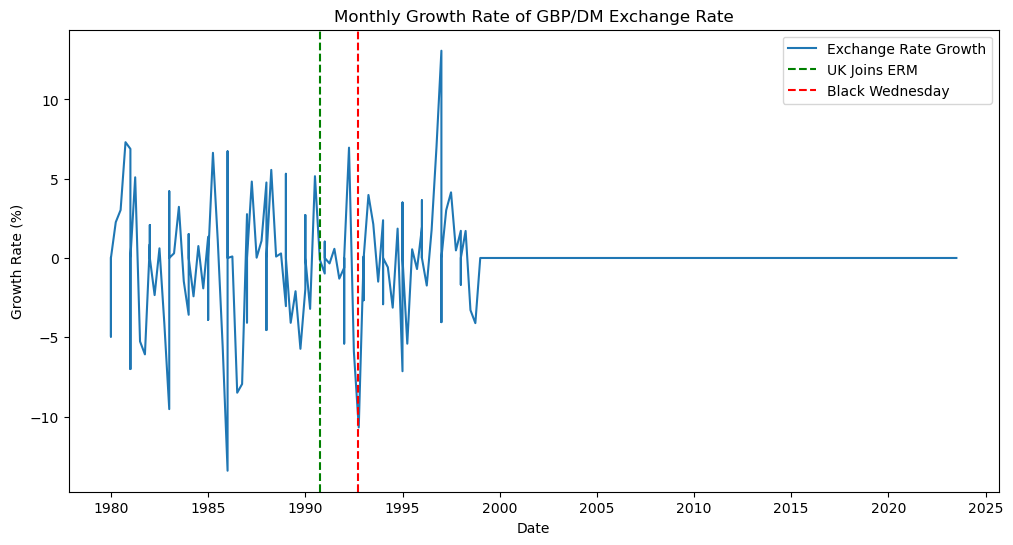

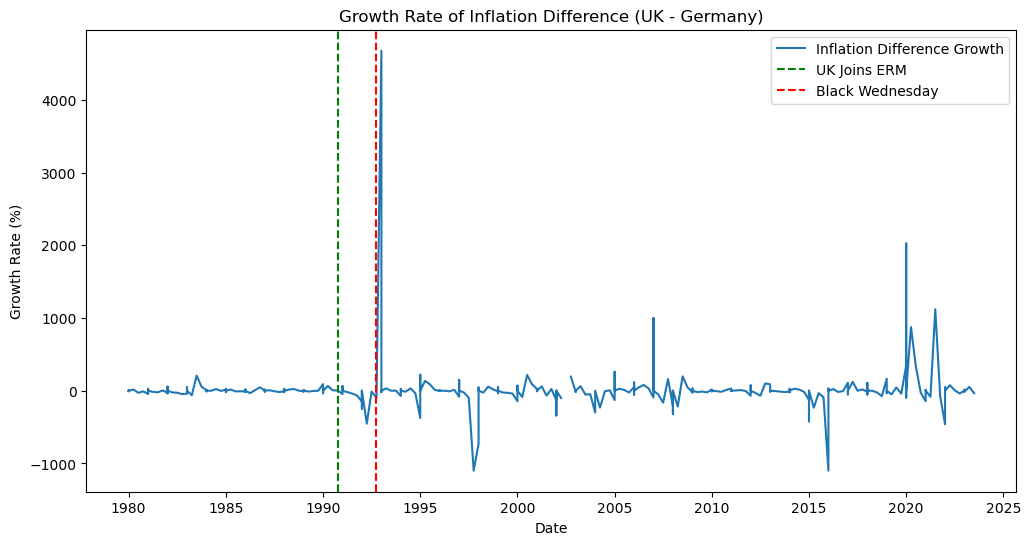

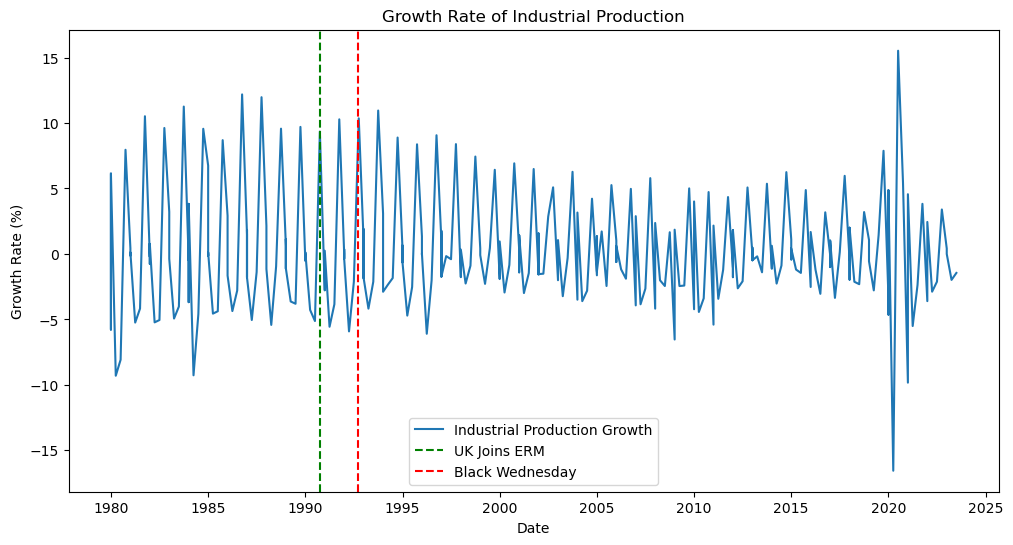

In [72]:
# Plot exchange rate growth volatility
plt.figure(figsize=(12, 6))
plt.plot(countries_df['Date'], countries_df['Exchange Rate Growth'], label='Exchange Rate Growth')
plt.axvline(x=pd.to_datetime('1990-10-08'), color='g', linestyle='--', label='UK Joins ERM')
plt.axvline(x=pd.to_datetime('1992-09-16'), color='r', linestyle='--', label='Black Wednesday')
plt.title('Monthly Growth Rate of GBP/DM Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()

# Plot inflation difference growth volatility
plt.figure(figsize=(12, 6))
plt.plot(countries_df['Date'], countries_df['Inflation Diff Growth'], label='Inflation Difference Growth')
plt.axvline(x=pd.to_datetime('1990-10-08'), color='g', linestyle='--', label='UK Joins ERM')
plt.axvline(x=pd.to_datetime('1992-09-16'), color='r', linestyle='--', label='Black Wednesday')
plt.title('Growth Rate of Inflation Difference (UK - Germany)')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()

# Plot industrial production growth volatility
plt.figure(figsize=(12, 6))
plt.plot(countries_df['Date'], countries_df['Industrial Production Growth'], label='Industrial Production Growth')
plt.axvline(x=pd.to_datetime('1990-10-08'), color='g', linestyle='--', label='UK Joins ERM')
plt.axvline(x=pd.to_datetime('1992-09-16'), color='r', linestyle='--', label='Black Wednesday')
plt.title('Growth Rate of Industrial Production')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()